In [365]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [366]:
data = pd.read_csv('CustomerChurn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [367]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [369]:
data.shape

(7043, 21)

In [370]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [371]:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [372]:
print(data.describe)

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [373]:
data=data.drop(['customerID'], axis=1)

In [374]:
data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [375]:
data.isnull().values.any()


np.False_

In [376]:
data.duplicated().sum()


np.int64(22)

Total Charges is considered as object so we need to convert it to numeric

In [377]:
# Convert column to numeric, coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Now check type
print(data['TotalCharges'].dtype)


float64


In [378]:
data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


TotalCharges have 11 Missing Values

In [379]:
# See the rows with missing TotalCharges
data[np.isnan(data['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


For me as we can see the 11 Customers that have Nan TotalCharges have a tenure 0 .
I removed tenure=0 records because they represent new customers with no billing history and account for only 0.15% of the dataset. Keeping them adds noise with no benefit, so removing them improves consistency without losing meaningful information

In [380]:
data[data['tenure'] == 0].shape


(11, 20)

In [381]:
data[(data['tenure'] == 0) & (data['TotalCharges'].isna())].shape[0]


11

In [382]:
len_zero = data[data['tenure'] == 0].shape[0]
total_rows = data.shape[0]
percentage = (len_zero / total_rows) * 100
percentage


0.1561834445548772

In [383]:
#15% of the data is small pourcentage so let's drop the rows with tenure = 0
data=data.drop(data[data['tenure']==0].index,axis=0)

In [384]:
data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [385]:
data["SeniorCitizen"]= data["SeniorCitizen"].map({0: "No", 1: "Yes"})
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [386]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [387]:
#Numeric Columns
numeric_columns = data.select_dtypes(include=["number"]).columns
numeric_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

Correlation between numeric columns : tenure and TotalCharges: 0.82--> very strong positive correlation
Also MonthlyCharges And TotalCharges-->0.65

In [388]:
#Let's see the correlation between numeric columns
corr_matrix_numeric_columns = data[numeric_columns].corr()
print(corr_matrix_numeric_columns)

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


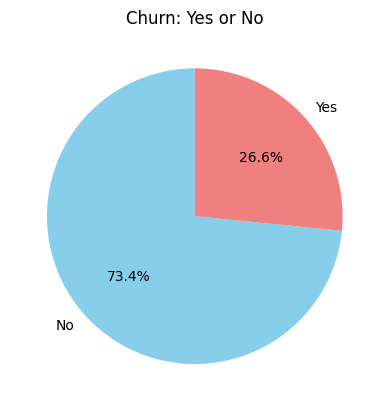

In [389]:
data["Churn"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=["skyblue", "lightcoral"]
)
plt.title("Churn: Yes or No")
plt.ylabel("")
plt.show()


In [390]:
# Count the number of samples in each class
count_values = data['Churn'].value_counts()

print(" (churn) distribution:")
print(count_values)

# Optional: display percentages too
print("\nPercentage distribution:")
print((count_values / len(data)) * 100)


 (churn) distribution:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Percentage distribution:
Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64


In [391]:
import matplotlib.pyplot as plt
import seaborn as sns

def churn_categorical_col(df, col_name):
    f, ax = plt.subplots(1, 3, figsize=(18, 5))
    df[col_name].value_counts().plot.pie(
        autopct='%1.1f%%', ax=ax[0], shadow=True, colors=sns.color_palette("Set3")
    )
    ax[0].set_title(f"{col_name} Distribution")
    ax[0].set_ylabel("")
    df[col_name].value_counts().plot.bar(
        ax=ax[1], color=sns.color_palette("Set3")
    )
    ax[1].set_title(f"Number of Customers by {col_name}")
    ax[1].set_xlabel(col_name)
    ax[1].set_ylabel("Count")
    sns.countplot(x=col_name, hue='Churn', data=df, palette="Set3", ax=ax[2])
    ax[2].set_title(f"Churn by {col_name}")
    ax[2].set_xlabel(col_name)
    ax[2].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

People who opted for fiber optic are more likely to churn

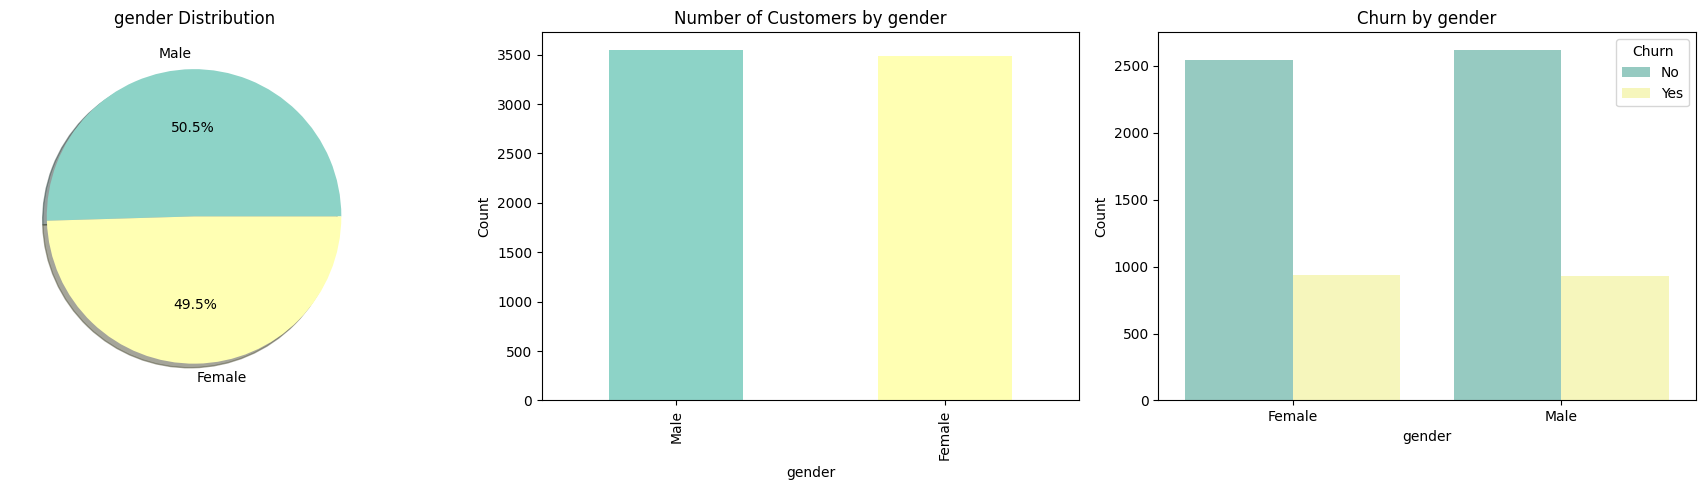

In [392]:
churn_categorical_col(data, "gender")


Customers without a partner are more likely to churn.

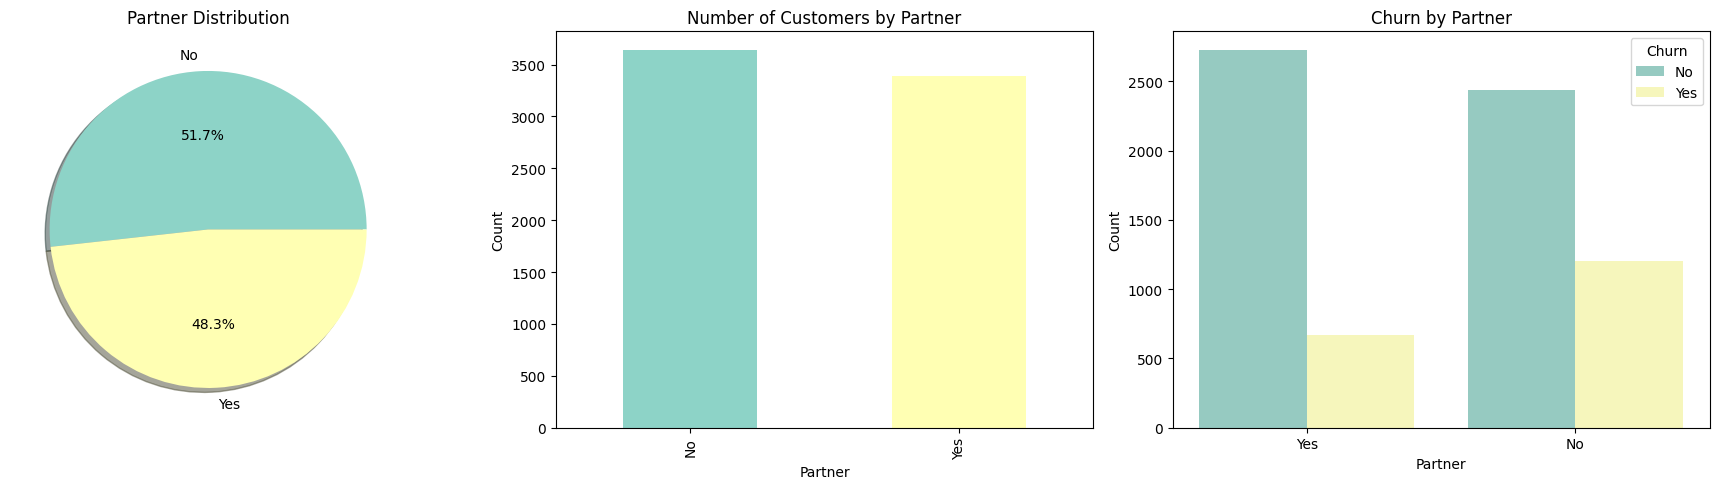

In [393]:
churn_categorical_col(data, "Partner")


Customers without dependents, or single customers, are more likely to churn.

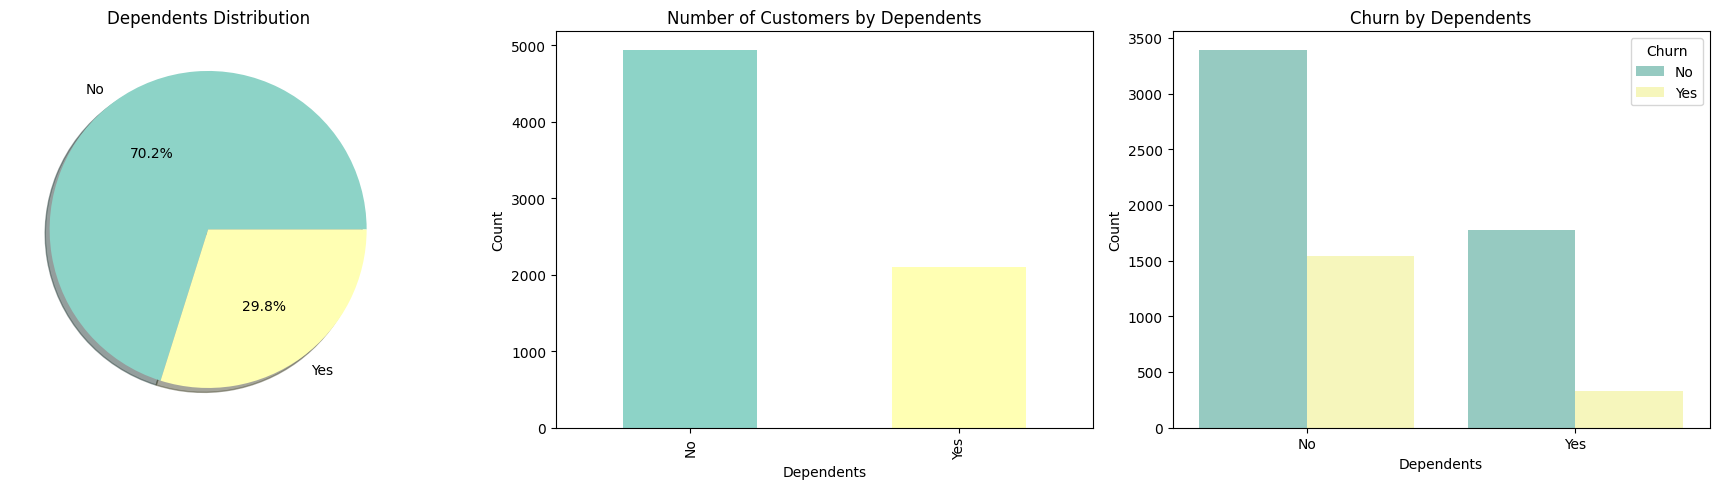

In [394]:
churn_categorical_col(data, "Dependents")


Senior customers tend to churn more.

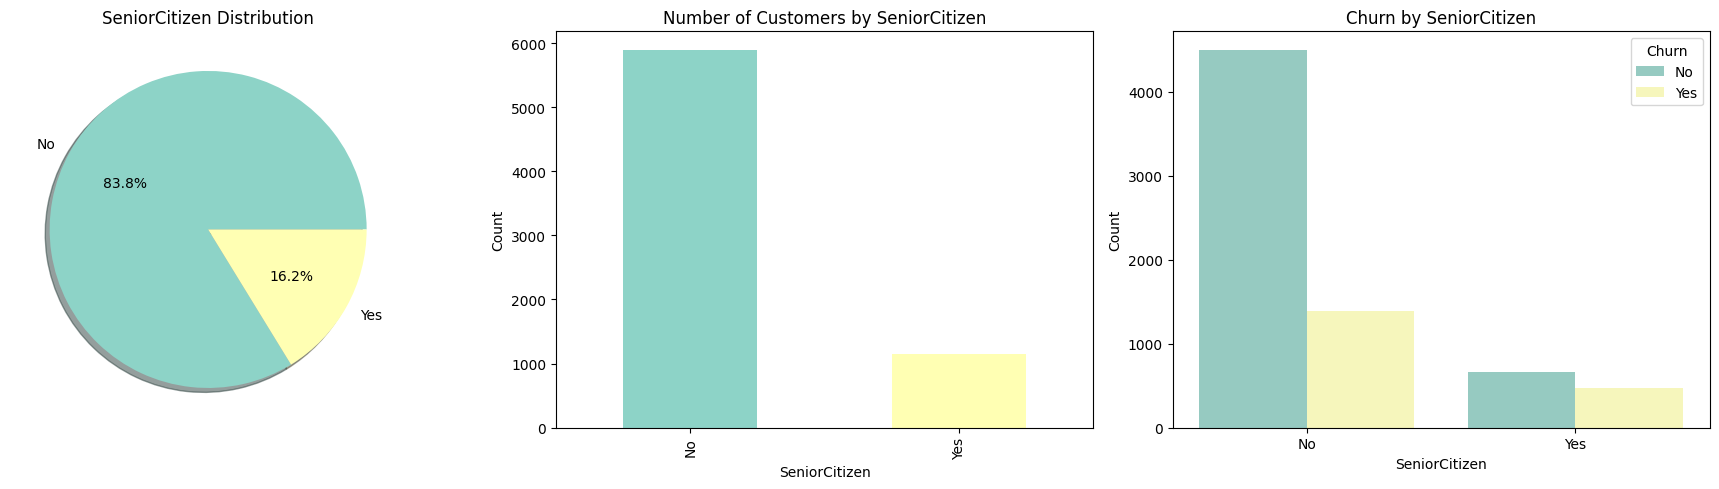

In [395]:
churn_categorical_col(data, "SeniorCitizen")


The analysis indicates that customers who do not have access to Technical Support tend to churn more often.

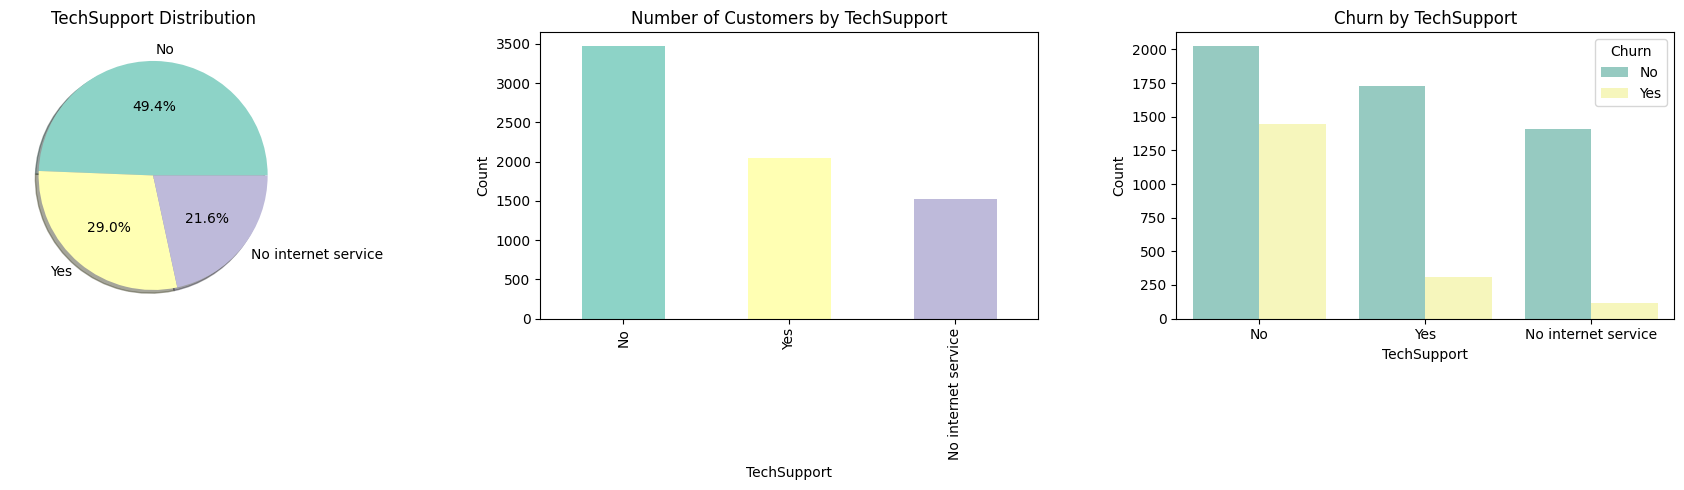

In [396]:
churn_categorical_col(data, "TechSupport")


Customers with month-to-month contracts are more likely to churn.

---



---



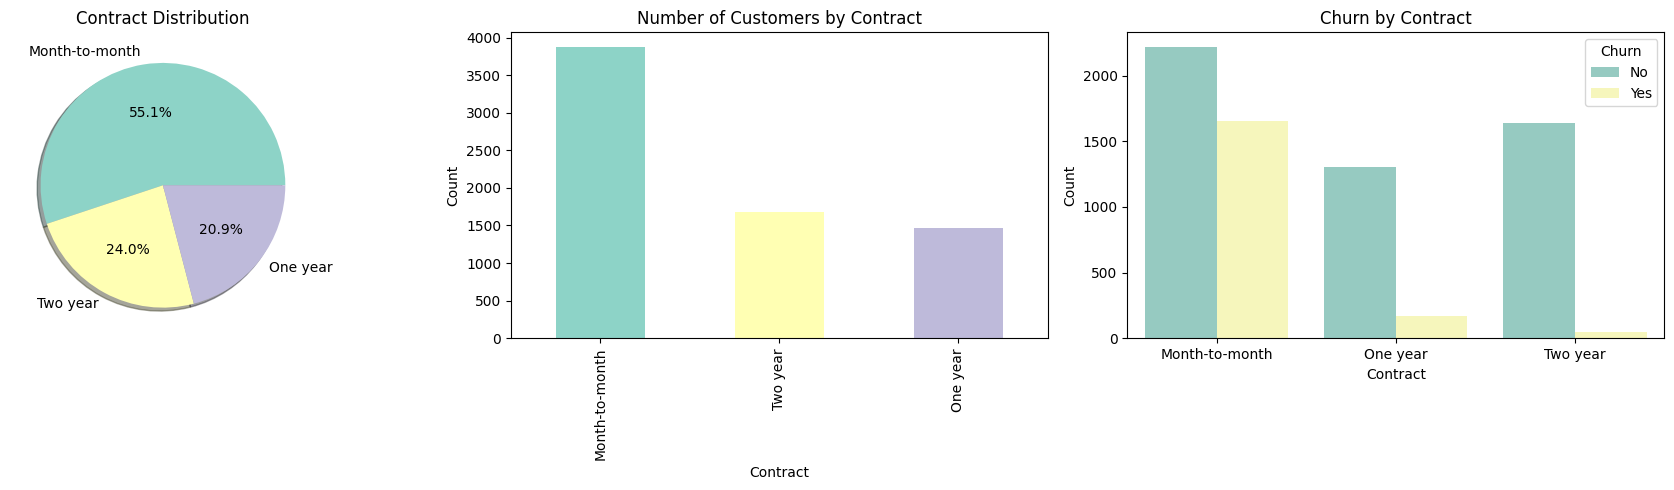

In [397]:
churn_categorical_col(data, "Contract")


Customers paying through electronic checks show a higher tendency to churn compared to those using other payment methods.

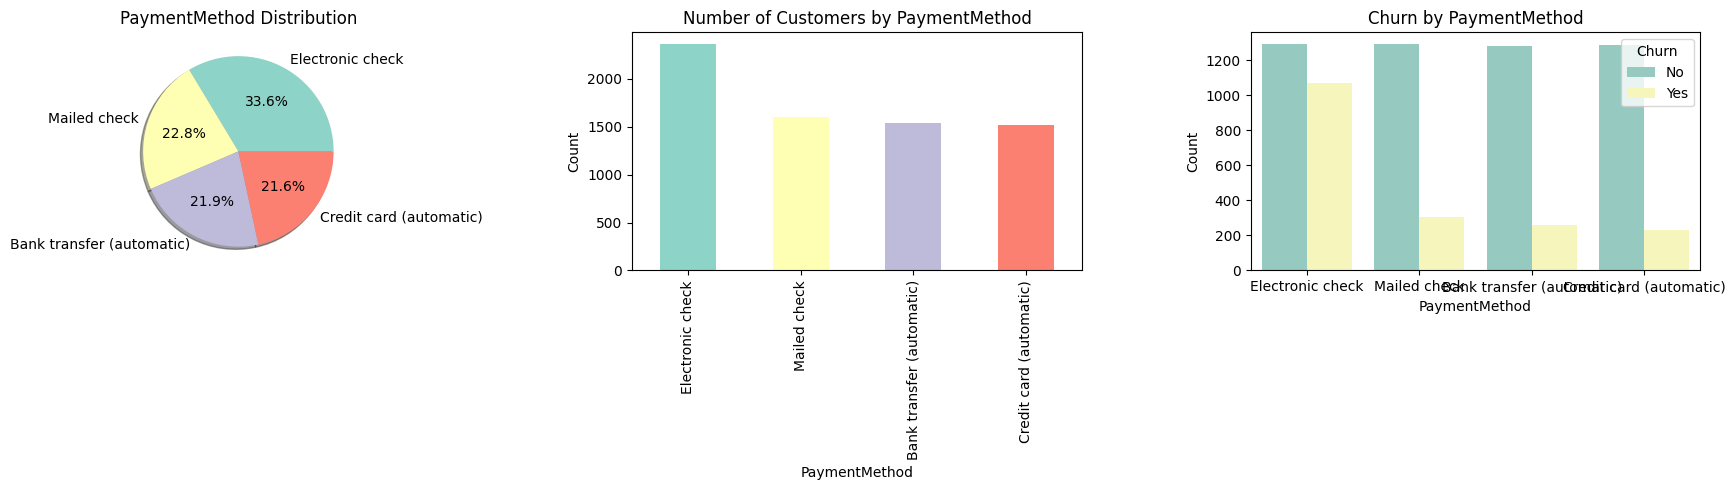

In [398]:
churn_categorical_col(data, "PaymentMethod")


In [399]:
import matplotlib.pyplot as plt

def numerical_feature_vis(data, col_name):
    plt.figure(figsize=(8,5))
    plt.hist(data[col_name], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{col_name} Distribution')
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.show()


Lower tenure is associated with a higher risk of churn.



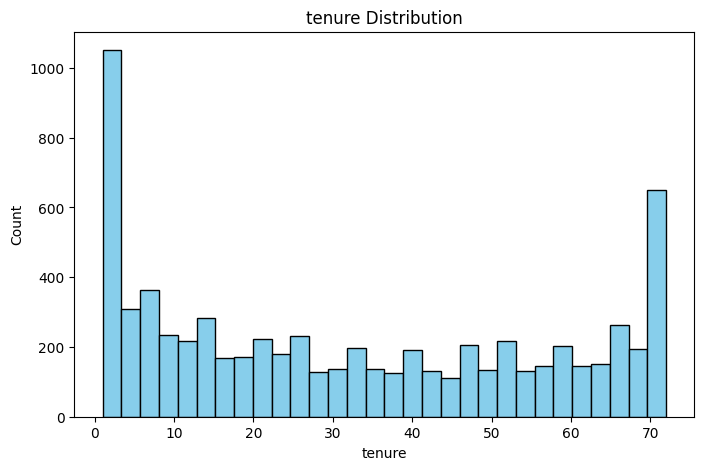

In [400]:
numerical_feature_vis(data, 'tenure')

Customers with higher monthly charges are more likely to churn.




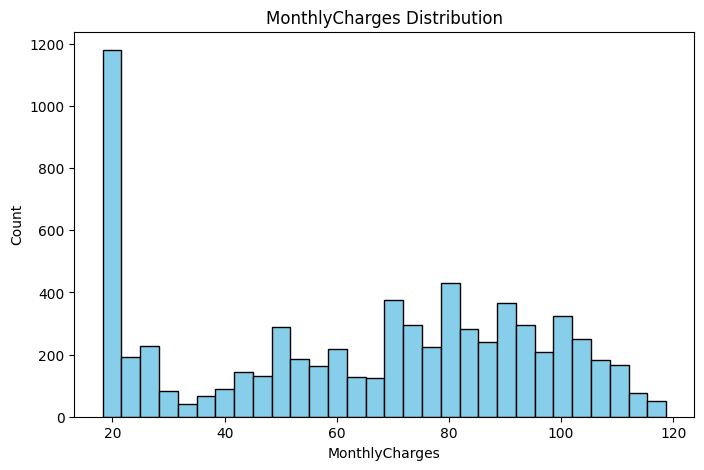

In [401]:
numerical_feature_vis(data, 'MonthlyCharges')


/tmp/ipython-input-956536125.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




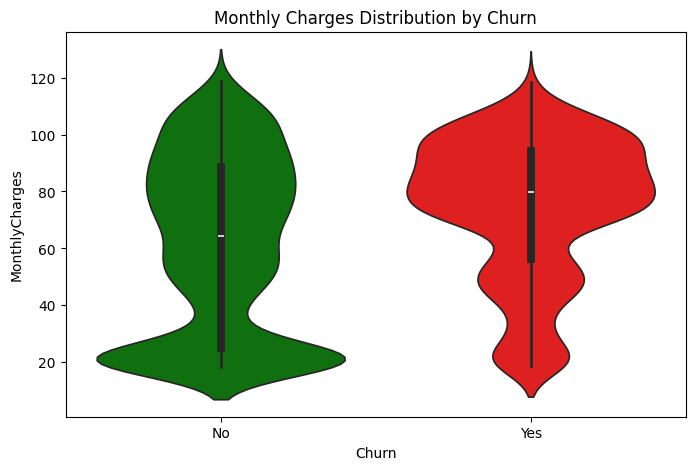

In [402]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.violinplot(x='Churn', y='MonthlyCharges', data=data, palette=['green', 'red'])
plt.title('Monthly Charges Distribution by Churn')
plt.show()


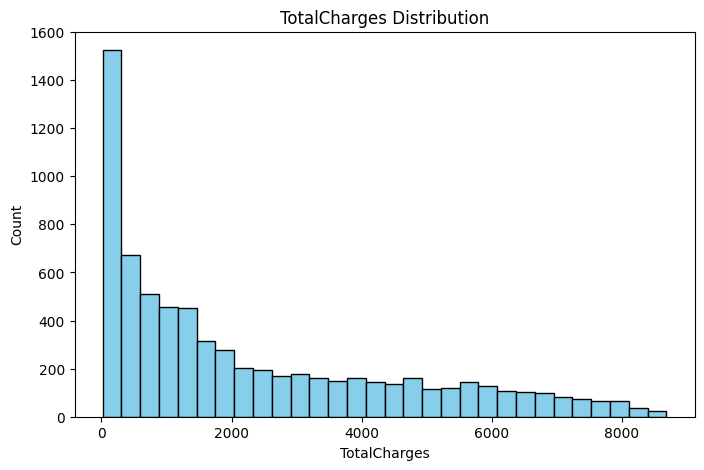

In [403]:
numerical_feature_vis(data, 'TotalCharges')


In [404]:
#Function to Categorical Columns
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(data, columns):
    for col in columns:
        lb = LabelEncoder()
        data[col] = lb.fit_transform(data[col])
    return data


In [405]:
cols_to_encode = ['gender','SeniorCitizen','Partner','Dependents', 'PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Contract','PaymentMethod','MultipleLines','Churn']  # put your columns here
data = label_encode_columns(data, cols_to_encode)


In [406]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


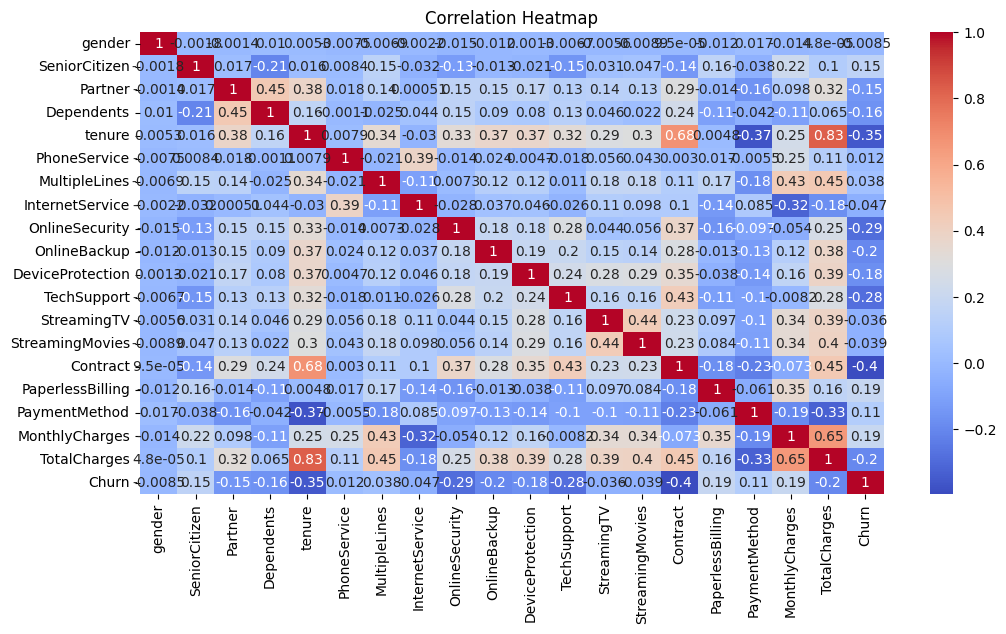

In [407]:
#CorrelationHeatmap
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [408]:
X = data.drop('Churn',axis='columns')
y = data['Churn']

In [409]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [410]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # original train data
X_test = scaler.transform(X_test)

Logistic Regression

In [411]:
model = LogisticRegression()

In [412]:

model.fit(X_train, y_train)

LogisticRegression()

In [413]:

y_pred = model.predict(X_test)

In [414]:

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



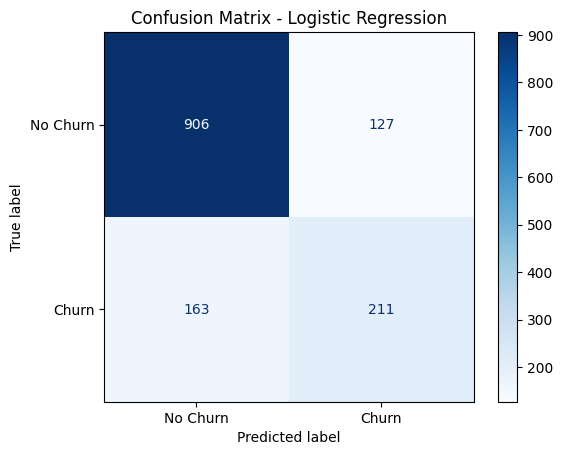

In [415]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn","Churn"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

KNN

In [416]:

knn_model = KNeighborsClassifier(n_neighbors=5)


In [417]:
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [418]:
y_pred_knn = knn_model.predict(X_test)


In [419]:
print(classification_report(y_test, y_pred_knn, target_names=["No Churn","Churn"]))


              precision    recall  f1-score   support

    No Churn       0.83      0.83      0.83      1033
       Churn       0.53      0.53      0.53       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407



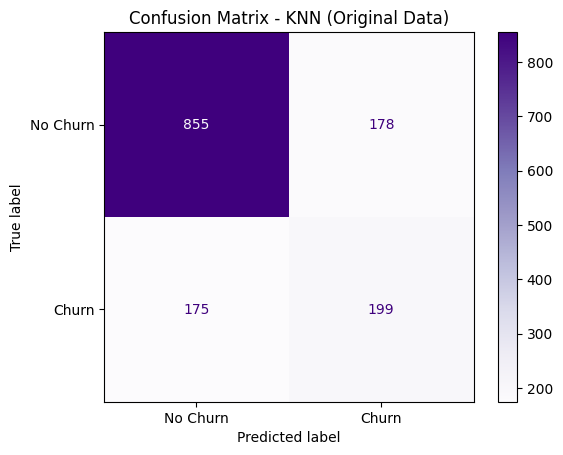

In [420]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["No Churn","Churn"])
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - KNN (Original Data)")
plt.show()

Decision Tree

In [421]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [422]:
y_pred_dt = dt_clf.predict(X_test)

In [423]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1033
           1       0.47      0.50      0.48       374

    accuracy                           0.71      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.72      0.71      0.72      1407



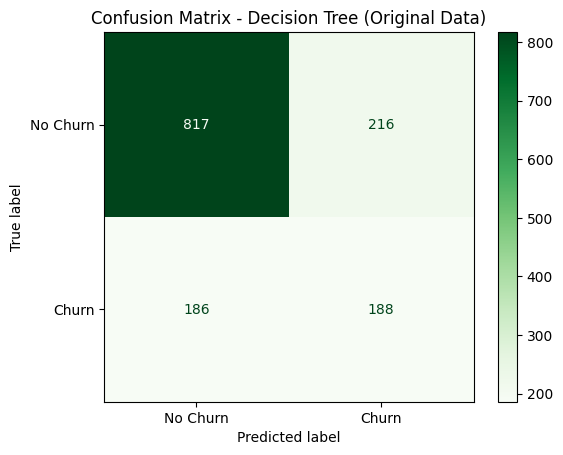

In [424]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["No Churn","Churn"])
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Decision Tree (Original Data)")
plt.show()


Random Forest

In [425]:

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)



In [426]:

print(classification_report(y_test, y_pred_rf, target_names=["No Churn","Churn"]))

              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1033
       Churn       0.62      0.50      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407



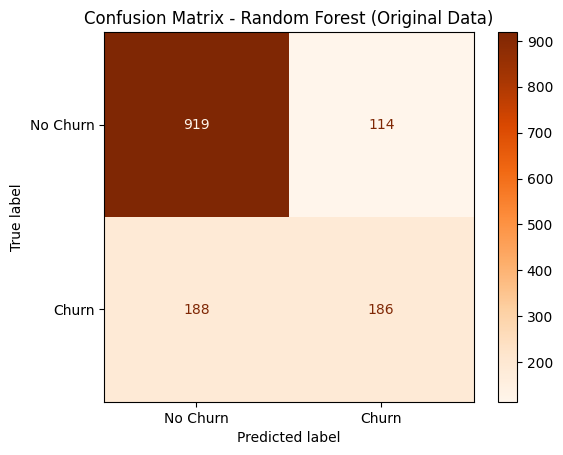

In [427]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["No Churn","Churn"])
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - Random Forest (Original Data)")
plt.show()

In [428]:
X[:2]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50


In [429]:
rf_model.feature_importances_

array([0.02804535, 0.0208744 , 0.02179564, 0.02060263, 0.15568514,
       0.00498387, 0.02396978, 0.02631652, 0.05206259, 0.02750105,
       0.02476266, 0.03453415, 0.01747567, 0.01705685, 0.08601144,
       0.02599021, 0.05009149, 0.17766816, 0.1845724 ])

In [430]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [431]:
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)
print(feat_imp)

             Feature  Importance
18      TotalCharges    0.184572
17    MonthlyCharges    0.177668
4             tenure    0.155685
14          Contract    0.086011
8     OnlineSecurity    0.052063
16     PaymentMethod    0.050091
11       TechSupport    0.034534
0             gender    0.028045
9       OnlineBackup    0.027501
7    InternetService    0.026317
15  PaperlessBilling    0.025990
10  DeviceProtection    0.024763
6      MultipleLines    0.023970
2            Partner    0.021796
1      SeniorCitizen    0.020874
3         Dependents    0.020603
12       StreamingTV    0.017476
13   StreamingMovies    0.017057
5       PhoneService    0.004984


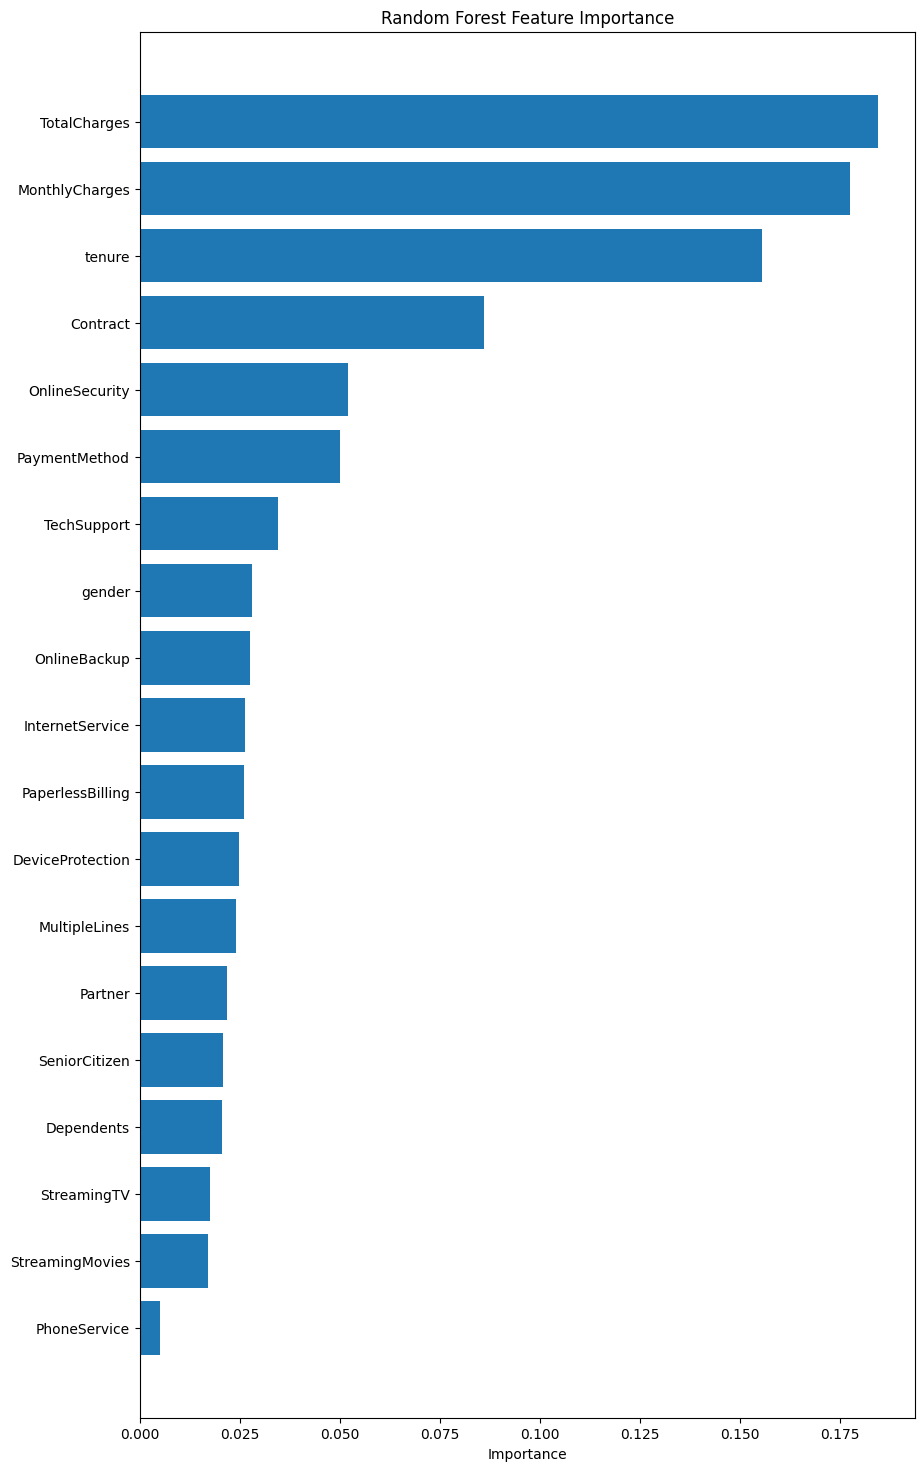

In [432]:
# Plot
plt.figure(figsize=(10,18))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.gca().invert_yaxis()  # Highest importance on top
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [433]:
import joblib


In [434]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']